In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [15]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/titanic.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [16]:
# Fill missing 'Age' with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill missing 'Embarked' with the most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-16-66f2c8f0204f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-16-66f2c8f0204f>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [17]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [18]:
# One-hot encoding for 'Embarked' and 'Sex'
categorical_features = ['Embarked', 'Sex']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
df = pd.concat([df, encoded_df], axis=1)
df.drop(categorical_features, axis=1, inplace=True)

In [19]:
features = ['Pclass', 'Age', 'Fare', 'FamilySize', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male']
X = df[features]
y = df['Survived']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
numerical_features = ['Age', 'Fare', 'FamilySize']
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [23]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

Pclass        0
Age           0
Fare          1
FamilySize    0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Sex_female    0
Sex_male      0
dtype: int64
Pclass        0
Age           0
Fare          0
FamilySize    0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Sex_female    0
Sex_male      0
dtype: int64


In [24]:
imputer = SimpleImputer(strategy='median')  # You can use 'mean', 'most_frequent', 'constant', etc.

# Fit the imputer on your training data and transform both train and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Convert back to DataFrame if needed
X_train = pd.DataFrame(X_train, columns=features)
X_test = pd.DataFrame(X_test, columns=features)

In [25]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_train_pred = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)

y_pred = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



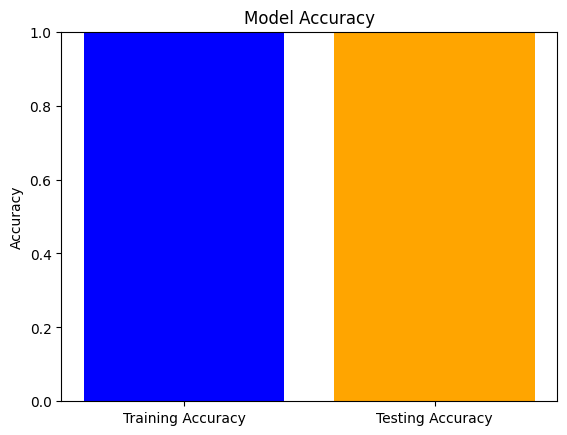

In [33]:
import matplotlib.pyplot as plt

# Assuming you have already calculated accuracy scores for training and testing sets
# (e.g., accuracy_train, accuracy_test)

# Create a bar plot
accuracy_scores = [accuracy_train, accuracy_test]
labels = ['Training Accuracy', 'Testing Accuracy']

plt.bar(labels, accuracy_scores, color=['blue', 'orange'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Set y-axis limits for better visualization
plt.show()